# Problem Identification

Fake News, a real phenomenon that exists in every society. Hoaxes and propaganda heavily distorted people's perspective, making the iliterate a victim of misinformation that has real prominent harmful outcomes. With nowadays technology to spread information and several irresponsible parties in journalism industry, this has become a global event.

This event not only impact but reigns over people perception & action to give highly negative effects towards society. And it's controlled by numbers of people behind the screen. Manual ways to identify a fake news is not an effective method towards this status quo. Therefore we need a sophisticated and high-end technology to offset current situation.

Our idea is to use Artificial Intelligence to detect wether a news is considerable ```fake``` or ```real```. We thrive our best to build the greatest AI model by testing multiple algorithms and comparing multiple performance matrix.

# Why this dataset?

1. Large amount of rows to increase our model accuracy.

2. Content clarity

3. Easy to manipulate (preprocessing needs)

# Import Libraries

We use ```pandas``` to read csv file



We use ```string``` & ```re``` to preprocessing

In [65]:
import pandas as pd
import string
import re

We use ```sklearn``` to make instances of each algorithms

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

We also use ```sklearn``` train the algorithm & measure each algo's performance

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import (
    KFold,
    StratifiedKFold,
    cross_val_score,
    GridSearchCV,
)
from sklearn.feature_extraction.text import TfidfVectorizer

# Read & Visualizing File

These commands gives a quick preview about the data and label by adding ```class``` collumn.

In [68]:
data_fake = pd.read_csv('datasets/Fake.csv')
data_true = pd.read_csv('datasets/True.csv')

In [69]:
data_fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [70]:
data_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [71]:
# add class col
data_fake["class"] = 0
data_true["class"] = 1

In [72]:
data_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


## Manual Testing

Take sample of the dataset to train ```manual testing``` method. and also label them the same way like we did on the datasets above.??????

In [73]:
# get data for manual testing
data_fake_manual_testing = data_fake.iloc[-10:]
data_true_manual_testing = data_true.iloc[-10:]

# Drop data from original datasets
data_fake = data_fake.iloc[:-10]
data_true = data_true.iloc[:-10]

In [74]:
# add class col
data_fake_manual_testing["class"] = 0
data_true_manual_testing["class"] = 1

In [75]:
data_true_manual_testing.head()

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


In [76]:
data_merge = pd.concat([data_fake,data_true], axis = 0)

In [77]:
data_merge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [78]:
data_merge.tail()

,title,text,subject,date,class
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1


In [79]:
data = data_merge.drop(['title', 'subject', 'date'], axis = 1)

In [80]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [81]:
data = data.sample(frac=1).reset_index(drop=True)

In [82]:
data.head()

,text,class
0,STOCKHOLM (Reuters) - U.S. President-elect Don...,1
1,"ANKARA (Reuters) - Russia, Iran and Turkey hav...",1
2,NEW YORK (Reuters) - The Obama administration ...,1
3,MOSCOW (Reuters) - Russia is ready to resume c...,1
4,"PARIS (Reuters) - France s prime minister, who...",1


# Preprocessing

Includes lower-casing each text, removing square bracketed text, replacing URLs with an empty string, removing HTML tags, stripping punctuation, and eliminating alphanumeric characters that contain digits.

In [83]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\[.*?\]", "", text)
    text = "".join(char if char.isalnum() or char.isspace() else " " for char in text)
    text = re.sub(r"https?://\S+|www\.\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = "".join(char for char in text if char not in string.punctuation)
    text = re.sub(r"\w*\d\w*", "", text)

    return text

In [84]:
data['text'] = data['text'].apply(clean_text)

In [85]:
data

,text,class
0,stockholm reuters u s president elect don...,1
1,ankara reuters russia iran and turkey hav...,1
2,new york reuters the obama administration ...,1
3,moscow reuters russia is ready to resume c...,1
4,paris reuters france s prime minister who...,1
...,...,...
44873,atlanta reuters president donald trump ple...,1
44874,chester township pa reuters republican p...,1
44875,michigan s republican governor rick snyder has...,0
44876,reuters the virginia supreme court on thur...,1


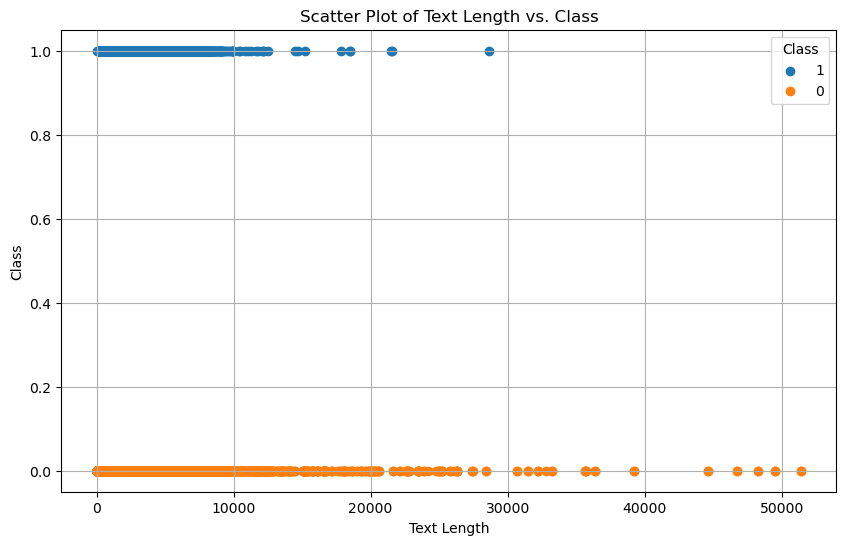

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

data["text_length"] = data["text"].apply(len)

# Plot scatter plot
plt.figure(figsize=(10, 6))
for class_label in data["class"].unique():
    subset = data[data["class"] == class_label]
    plt.scatter(subset["text_length"], subset["class"], label=class_label)

plt.title("Scatter Plot of Text Length vs. Class")
plt.xlabel("Text Length")
plt.ylabel("Class")
plt.legend(title="Class")
plt.grid(True)
plt.show()

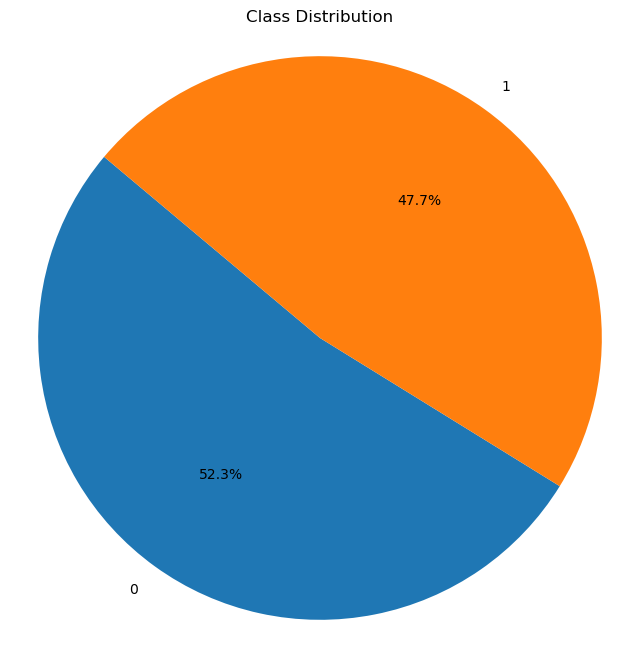

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

class_distribution = data["class"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    class_distribution,
    labels=class_distribution.index,
    autopct="%1.1f%%",
    startangle=140,
)
plt.title("Class Distribution")
plt.axis("equal") 
plt.show()

# Training

Includes:

- Assigning $X$ and $Y$ axis with text and class respectively.

- Splitting data for training and testing with a special random state (reproducibility).

- Using ```TfidfVectorizer()``` to create a new matrix that will be used in algorithms.

In [23]:
X = data['text']
y = data['class']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=101)

In [25]:
print(X_train)

42665    president barack obama had plenty of obstacles...
38272    washington  reuters    u s  president donald t...
43098     century wire says in so many respects   our  ...
11283    new york  reuters    new york city mayor bill ...
4838     phnom penh  reuters    cambodians on thursday ...
                               ...                        
12363    wow  this compilation of blatant blocking for ...
5695                                                      
8006     washington  reuters    huntington ingalls inc ...
17745    washington  reuters    public refusals on wedn...
17931    remember when candidate donald trump was conde...
Name: text, Length: 33658, dtype: object


In [26]:
print(X_test)

16775    washington  reuters    u s  president barack o...
3083     acr s boiler room presents a christmas poem tw...
21200    warsaw  reuters    poland s ruling party lawma...
18086    just days after donald trump advisor and avowe...
1197       century wire asks have your shout  friday ni...
                               ...                        
42518    jay dyer  century wiresick of politics  well  ...
39315    america will have a fascist in the white house...
4199     sydney washington  reuters     u s  president ...
21939    this is mob rule again  the best part of this ...
35262    washington  reuters    u s  defense secretary ...
Name: text, Length: 11220, dtype: object


In [27]:
print(y_train)

42665    0
38272    1
43098    0
11283    1
4838     1
        ..
12363    0
5695     0
8006     1
17745    1
17931    0
Name: class, Length: 33658, dtype: int64


In [28]:
print(y_test)

16775    1
3083     0
21200    1
18086    0
1197     0
        ..
42518    0
39315    0
4199     1
21939    0
35262    1
Name: class, Length: 11220, dtype: int64


In [29]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

In [30]:
print(xv_train)

  (0, 12403)	0.06283221356371092
  (0, 74501)	0.061971780064219634
  (0, 90001)	0.03415511915190381
  (0, 39109)	0.03750691687903493
  (0, 28678)	0.03927024979626043
  (0, 36572)	0.03770836771007874
  (0, 90086)	0.09045565572596553
  (0, 91311)	0.04523136548542109
  (0, 24505)	0.11289043931611449
  (0, 78191)	0.029118907614075623
  (0, 7331)	0.047750709306907405
  (0, 81228)	0.08295846222723152
  (0, 92217)	0.021854719016672974
  (0, 62605)	0.02696161797968463
  (0, 87501)	0.06967040754723351
  (0, 82306)	0.05160165516627494
  (0, 25916)	0.04377457684596599
  (0, 81275)	0.0913503787335744
  (0, 1224)	0.07523356465668221
  (0, 36260)	0.10277432961574919
  (0, 88401)	0.0708496054045607
  (0, 4248)	0.022096299930209666
  (0, 65630)	0.06064167425368661
  (0, 89675)	0.046121236017243196
  (0, 4622)	0.019500323538660443
  :	:
  (33657, 83840)	0.0916319041527547
  (33657, 37176)	0.02000507832131737
  (33657, 55028)	0.013535961108405138
  (33657, 59774)	0.020311240676414054
  (33657, 7185)	0.0

In [31]:
print(xv_test)

  (0, 94170)	0.01789563028580114
  (0, 94139)	0.03557356082758353
  (0, 93882)	0.013974354433400395
  (0, 93871)	0.024868647610337948
  (0, 93309)	0.02652010582315369
  (0, 93171)	0.01927527684992124
  (0, 93095)	0.026583173203048434
  (0, 92753)	0.036062808037162025
  (0, 92418)	0.039832988825959245
  (0, 92293)	0.02827325361679693
  (0, 92263)	0.017239059032394966
  (0, 92217)	0.025895545555980115
  (0, 92141)	0.013965111642241092
  (0, 92071)	0.030670195455621826
  (0, 92066)	0.01695411776291464
  (0, 92051)	0.014313593474852322
  (0, 92045)	0.02155970418396787
  (0, 91833)	0.01066089619646077
  (0, 91640)	0.020733008263575586
  (0, 91497)	0.01943668869479491
  (0, 91340)	0.025896490978810548
  (0, 91260)	0.026520998509937284
  (0, 91241)	0.007718987210729067
  (0, 91187)	0.02376167900303879
  (0, 90542)	0.031733295097141394
  :	:
  (11219, 11636)	0.037624475224328206
  (11219, 11529)	0.014265750118627532
  (11219, 10709)	0.27156425930914707
  (11219, 9638)	0.05303407114187624
  (11

# Algorithms & Visualization

All of the algoritms respects the procedure as follows:

1. *Create an instance* of the algorithm class

2. Fitting the data for ```xv_train``` and ```y_train```

3. Predict the data using ```xv_test```

4. Create score for the model we train

5. Make other performance indicator for comparison

## 1.1) Logistic Regression: Algorithm

In [32]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [33]:
pred_lr = LR.predict(xv_test)

In [34]:
LR.score(xv_test, y_test)

0.9852941176470589

In [35]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5813
           1       0.98      0.99      0.98      5407

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## 1.2) Logistic Regression: Visualization

Accuracy: 0.9852941176470589


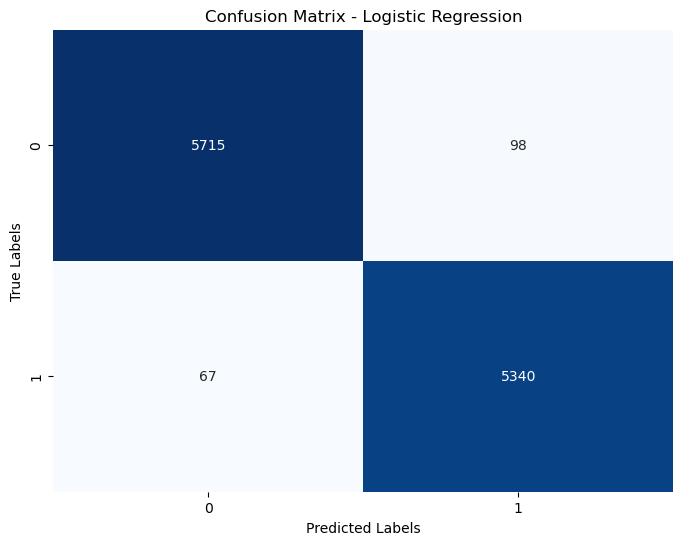


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5813
           1       0.98      0.99      0.98      5407

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

LR = LogisticRegression()
LR.fit(xv_train, y_train)

# Predictions
pred_lr = LR.predict(xv_test)

# accuracy
accuracy = LR.score(xv_test, y_test)
print("Accuracy:", accuracy)

# confusion matrix
cm = confusion_matrix(y_test, pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, pred_lr))

## 2.1) Decision Tree Classifier: Algorithm

In [37]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [38]:
pred_dt = DT.predict(xv_test)

In [39]:
DT.score(xv_test, y_test)

0.9943850267379679

In [40]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5813
           1       0.98      0.99      0.98      5407

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## 2.2) Decision Tree Classifier: Visualization

Accuracy: 0.9944741532976827


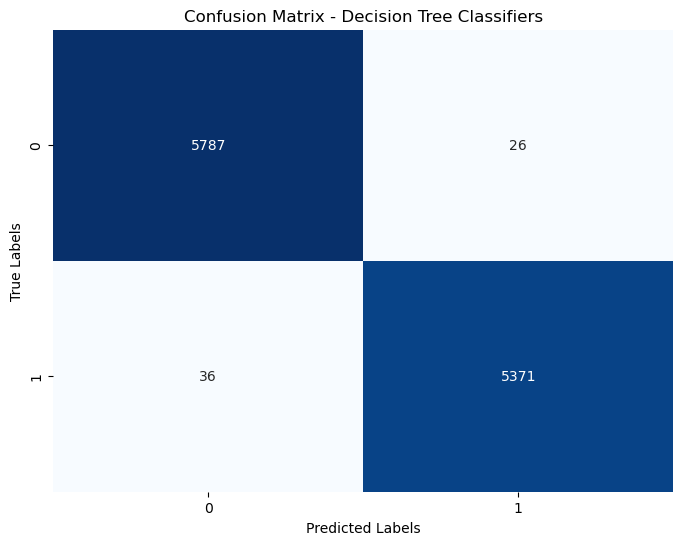


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5813
           1       1.00      0.99      0.99      5407

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

# Predictions
pred_dt = DT.predict(xv_test)

# accuracy
accuracy = DT.score(xv_test, y_test)
print("Accuracy:", accuracy)

# confusion matrix
cm = confusion_matrix(y_test, pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Decision Tree Classifiers")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, pred_dt))

## 3.1) Gradient Boost Classifier: Algorithm

In [90]:
GB = GradientBoostingClassifier(random_state=0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [91]:
pred_gb = GB.predict(xv_test)

In [92]:
GB.score(xv_test, y_test)

0.9957219251336898

## 3.2) Gradient Boost Classifier: Visualization

Accuracy: 0.9852941176470589


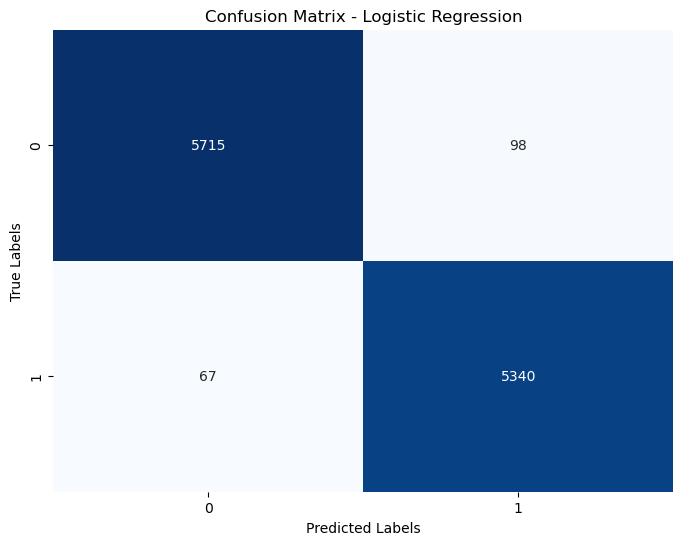


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5813
           1       0.98      0.99      0.98      5407

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

GB = GradientBoostingClassifier()
GB.fit(xv_train, y_train)

# Predictions
pred_lr = LR.predict(xv_test)

# accuracy
accuracy = LR.score(xv_test, y_test)
print("Accuracy:", accuracy)

# confusion matrix
cm = confusion_matrix(y_test, pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, pred_lr))

## 4.1) Random Forest Classifier:  Algorithm

In [93]:
RF = RandomForestClassifier(random_state=0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [94]:
pred_rf = RF.predict(xv_test)

In [95]:
RF.score(xv_test, y_test)

0.9875222816399287

## 4.2) Random Forest Classifier:  Visualization

Accuracy: 0.9852941176470589


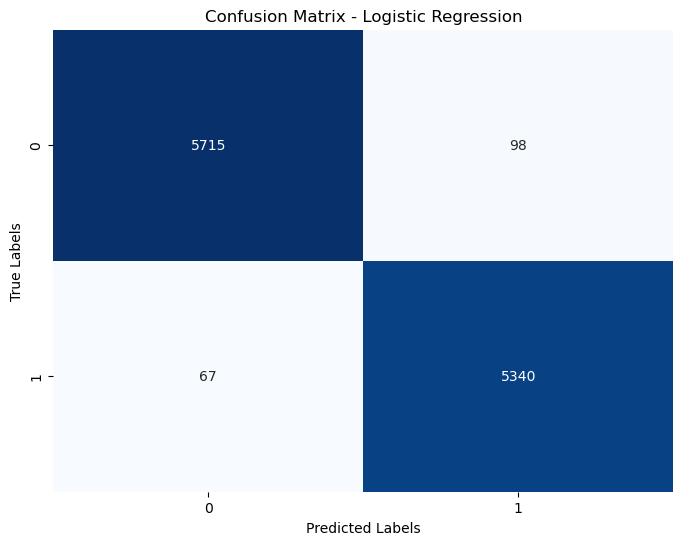


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5813
           1       0.98      0.99      0.98      5407

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [43]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

RF = RandomForestClassifier()
RF.fit(xv_train, y_train)

# Predictions
pred_lr = LR.predict(xv_test)

# accuracy
accuracy = LR.score(xv_test, y_test)
print("Accuracy:", accuracy)

# confusion matrix
cm = confusion_matrix(y_test, pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, pred_lr))

# Additional performance & data quality measurement

## 1) k-fold and stratified k-fold validation

In [46]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score


def evaluate_model(model, X_train, y_train, k=5, stratified=False):
    if stratified:
        kf = StratifiedKFold(n_splits=k)
    else:
        kf = KFold(n_splits=k)

    accuracies = []

    for train_index, val_index in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = xv_train[train_index], xv_train[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)
        accuracy = accuracy_score(y_val_fold, y_pred)
        accuracies.append(accuracy)

    avg_accuracy = sum(accuracies) / len(accuracies)
    return avg_accuracy


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

data_fake = pd.read_csv("datasets/Fake.csv")
data_true = pd.read_csv("datasets/True.csv")

# class column
data_fake["class"] = 0
data_true["class"] = 1

# Get data for manual testing
data_fake_manual_testing = data_fake.iloc[-10:]
data_true_manual_testing = data_true.iloc[-10:]

# Drop data from original datasets
data_fake = data_fake.iloc[:-10]
data_true = data_true.iloc[:-10]

# class column
data_fake_manual_testing["class"] = 0
data_true_manual_testing["class"] = 1

# Merge
data_merge = pd.concat([data_fake, data_true], axis=0)
data = data_merge.drop(["title", "subject", "date"], axis=1)
data = data.sample(frac=1).reset_index(drop=True)


def clean_text(text):
    text = text.lower()
    text = re.sub(r"\[.*?\]", "", text)
    text = "".join(char if char.isalnum() or char.isspace() else " " for char in text)
    text = re.sub(r"https?://\S+|www\.\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = "".join(char for char in text if char not in string.punctuation)
    text = re.sub(r"\w*\d\w*", "", text)
    return text


# preprocessing
data["text"] = data["text"].apply(clean_text)
X = data["text"]
y = data["class"]

# Split data (test, train)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=101
)

# Vectorize
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

models = [LR, DT, RF]
for model in models:
    avg_accuracy = evaluate_model(model, xv_train, y_train, k=5, stratified=True)
    print("Model:", model.__class__.__name__)
    print("Average accuracy:", avg_accuracy)

Model: LogisticRegression
Average accuracy: 0.9852634510132303
Model: DecisionTreeClassifier
Average accuracy: 0.9948006902729126


KeyboardInterrupt: 

## 2) Using cross_val_score and pipeline

Average Accuracy: 0.9870759834954494


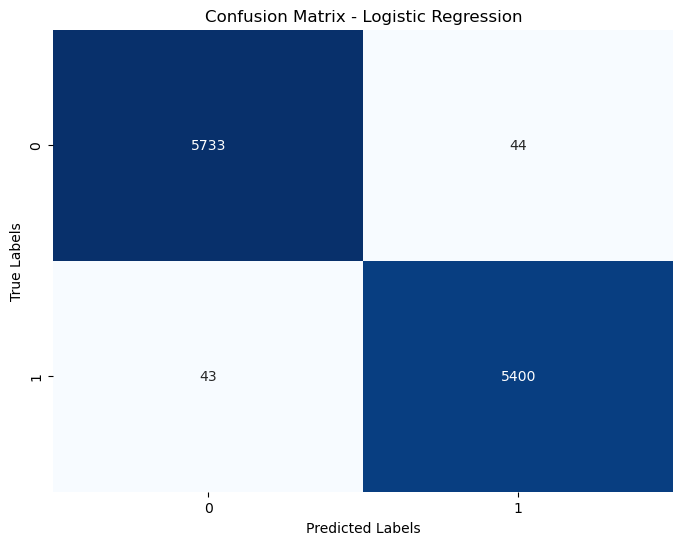


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5777
           1       0.99      0.99      0.99      5443

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the pipeline
pipeline = Pipeline([("tfidf", TfidfVectorizer()), ("clf", LogisticRegression())])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5)

# Print average accuracy
print("Average Accuracy:", cv_scores.mean())

# Train the pipeline on the entire dataset
pipeline.fit(X, y)

# Predictions on the test set
pred_lr = pipeline.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred_lr)

# Create heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Create classification report
print("\nClassification Report:")
print(classification_report(y_test, pred_lr))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid
param_grid = {
    "clf__C": [
        0.001,
        0.01,
        0.1,
        1,
        10,
        100,
    ],  # Regularization parameter for Logistic Regression
}

# Define the pipeline with TfidfVectorizer and LogisticRegression
pipeline = Pipeline([("tfidf", TfidfVectorizer()), ("clf", LogisticRegression())])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

/Users/Jerusha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Jerusha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Best Parameters: {'clf__C': 100}
Best Score: 0.9936419081708218


/Users/Jerusha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Testing

Using *manual test* to see if the outcome matches the actual result.

In [45]:
def lable(n):
    if n == 0:
        return "Fake"
    elif n == 1:
        return "True"
    else:
        return "Unidentified"
    
def manual_test(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(clean_text)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    
    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction:{}".format(lable(pred_LR[0]),
                                                                                                             lable(pred_DT[0]),
                                                                                                             lable(pred_GB[0]),
                                                                                                             lable(pred_RF[0])))

In [ ]:
news = str(
    "21st Century Wire says This week, the historic international Iranian Nuclear Deal was punctuated by a two-way prisoner swap between Washington and Tehran, but it didn t end quite the way everyone expected. On the Iranian side, one of the U.S. citizens who was detained in Iran, Nosratollah Khosravi-Roodsari, has stayed in Iran, but on the U.S. side   all 7 of the Iranians held in U.S. prisons DID NOT show up to their flight to Geneva for the prisoner exchange   with at least 3 electing to stay in the U.S  TEHRAN SIDE: In Iran, 5 U.S. prisoners were released, with 4 of them making their way to Germany via Switzerland.Will Robinson Daily MailNone of the Iranians freed in the prisoner swap have returned home and could still be in the United States, it has been reported.The seven former inmates, who were released as part of a deal with the Islamic republic, did not show up to get a flight to Geneva, Switzerland, where the exchange was set to take place on Sunday.Three of the Iranians have decided to stay in the United States, ABC reported, with some moving in with their families. However it is not known where the other four are.Three of the Americans who had been detained in Iran   Washington Post journalist Jason Rezaian, former U.S. Marine Amir Hekmati and Christian pastor Saeed Abedini   left Tehran at around 7am the same day, but weren t met by their counterparts in Switzerland Continue this story at the Mail OnlineREAD MORE IRAN NEWS AT: 21st Century Wire Iran Files"
)
manual_test(news)



LR Predicition: True 
DT Prediction: True 
GBC Prediction: True 
RFC Prediction:True
